In [2]:
import torchaudio
import torch
import torch.nn as nn
import pandas as pd


if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")


Running on the CPU


In [3]:
df = pd.read_csv("data/bird_songs_metadata.csv")
df.head()

df = df.groupby("species").head(10)
df

,id,genus,species,subspecies,name,recordist,country,location,latitude,longitude,altitude,sound_type,source_url,license,time,date,remarks,filename
0,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-0.wav
1,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-1.wav
2,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-4.wav
3,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-5.wav
4,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-6.wav
5,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-8.wav
6,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-9.wav
7,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-11.wav
8,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-14.wav
9,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-15.wav


In [4]:
sample_rate = 22050
import librosa

def load_audio(path):
    waveform, sample_rate = librosa.load(path)
    return waveform

transform = torchaudio.transforms.LFCC(sample_rate=sample_rate)
transform

LFCC(
  (amplitude_to_DB): AmplitudeToDB()
  (Spectrogram): Spectrogram()
)

In [5]:
read_audio = []
for i in range(len(df)):
    path = df["filename"].iloc[i]
    waveform = load_audio("data/wavfiles/" + path)
    read_audio.append(waveform)
len(read_audio)

50

In [6]:
lfcc = []
for i in range(len(read_audio)):
    lfcc.append(transform(torch.tensor(read_audio[i])).mean(dim=1))

lfcc_tensor = torch.stack(lfcc)
lfcc_tensor.shape

torch.Size([50, 40])

In [7]:
species = df["species"].unique()
species

array(['bewickii', 'polyglottos', 'migratorius', 'melodia', 'cardinalis'],
      dtype=object)

In [8]:
import umap
import matplotlib.pyplot as plt



In [9]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(lfcc_tensor)
embedding.shape

(50, 2)

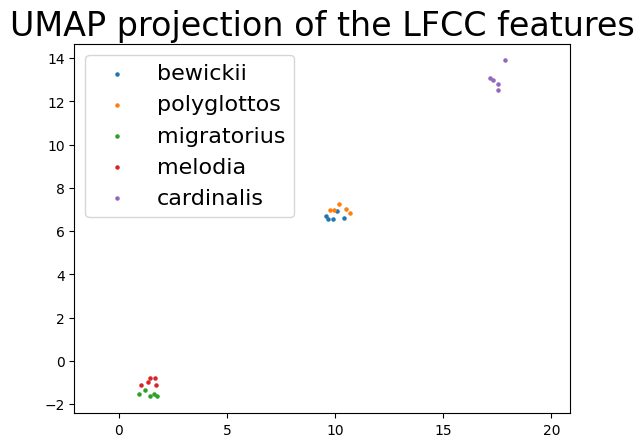

In [10]:
species = df["species"].unique()
color = []
for i in range(len(df)):
    for j in range(len(species)):
        if df["species"].iloc[i] == species[j]:
            color.append(j)

for i in range(len(species)):
    plt.scatter(embedding[i * 5:(i+1) * 5, 0], embedding[i * 5:(i+1) * 5, 1], label=species[i], s=5)
plt.gca().set_aspect("equal", "datalim")
plt.title("UMAP projection of the LFCC features", fontsize=24)
plt.legend(loc='best', fontsize=16)

plt.show()


In [11]:
df = pd.read_csv("data/bird_songs_metadata.csv")
df = df.groupby("species").head(50)

read_audio = []
for i in range(len(df)):
    path = df["filename"].iloc[i]
    waveform = load_audio("data/wavfiles/" + path)
    read_audio.append(waveform)


lfcc = []
for i in range(len(read_audio)):
    lfcc.append(transform(torch.tensor(read_audio[i])).mean(dim=1))

from sklearn.metrics.pairwise import cosine_similarity

base_cos_sin = 0
cos_sin_index = 0
cos_sin_index2 = 0
for i in range(len(lfcc)):
    for j in range(len(lfcc)):
        if i != j and df["species"].iloc[i] != df["species"].iloc[j]:
            cos_sin = cosine_similarity(lfcc[i].reshape(1, -1), lfcc[j].reshape(1, -1))
            if cos_sin > base_cos_sin:
                base_cos_sin = cos_sin
                cos_sin_index2 = i
                cos_sin_index = j
print(cos_sin_index, cos_sin_index2, base_cos_sin)
print(df["species"].iloc[cos_sin_index], df["species"].iloc[cos_sin_index2])
print(df["filename"].iloc[cos_sin_index], df["filename"].iloc[cos_sin_index2])
print("----")



152 46 [[0.9975144]]
melodia bewickii
565242-2.wav 480035-5.wav
----


In [12]:
import IPython.display as ipd
ipd.Audio("data/wavfiles/" + df["filename"].iloc[cos_sin_index])

In [13]:
ipd.Audio("data/wavfiles/" + df["filename"].iloc[cos_sin_index2])

In [14]:
base_cos_sin = 1
cos_sin_index = 0
cos_sin_index2 = 0
for i in range(len(lfcc)):
    for j in range(len(lfcc)):
        if i != j and df["species"].iloc[i] != df["species"].iloc[j]:
            cos_sin = cosine_similarity(lfcc[i].reshape(1, -1), lfcc[j].reshape(1, -1))
            if cos_sin < base_cos_sin:
                base_cos_sin = cos_sin
                cos_sin_index2 = i
                cos_sin_index = j

print(cos_sin_index, cos_sin_index2, base_cos_sin)
print(df["species"].iloc[cos_sin_index], df["species"].iloc[cos_sin_index2])
print(df["filename"].iloc[cos_sin_index], df["filename"].iloc[cos_sin_index2])
print("----")

125 29 [[0.02223866]]
migratorius bewickii
564324-5.wav 493957-5.wav
----


In [15]:
import IPython.display as ipd
ipd.Audio("data/wavfiles/" + df["filename"].iloc[cos_sin_index])

In [16]:
ipd.Audio("data/wavfiles/" + df["filename"].iloc[cos_sin_index2])